In [ ]:
import sklearn
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/maxaragon/mvstats.git

Cloning into 'mvstats'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 19 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


In [ ]:
cd mvstats

/content/mvstats


In [ ]:
state = pd.read_excel("stateatlas_2011-2019.xlsx"); state.set_index('ID', inplace=True)

In [ ]:
# Generate  a dataframe for every year in the open data (some excel files contain 2 years or more)

open_11_12 = pd.read_excel("open date_2011-2012.xlsx"); open_11_12.set_index('GCD', inplace=True); open_11 = open_11_12.filter(regex='11$',axis=1); open_12 = open_11_12.filter(regex='12$',axis=1); 
open_13_14 = pd.read_excel("open date_2013-2014.xlsx"); open_13_14.set_index('GCD', inplace=True); open_13 = open_13_14.filter(regex='13$',axis=1); open_14 = open_13_14.filter(regex='14$',axis=1); 
open_15_17 = pd.read_excel("open date_2015-2017.xlsx"); open_15_17.set_index('GCD', inplace=True); open_15 = open_15_17.filter(regex='15$',axis=1); open_16 = open_15_17.filter(regex='16$',axis=1); open_17 = open_15_17.filter(regex='17$',axis=1); 
open_18 = pd.read_excel("open date_2018.xlsx"); open_18.set_index('GCD', inplace=True); open_18 = open_18.filter(regex='18$',axis=1);
open_19 = pd.read_excel("open date_2019.xlsx"); open_19.set_index('GCD', inplace=True); open_19 = open_19.filter(regex='19$',axis=1);

In [ ]:
# Generate a dataframe for every year in the state atlas data

s11 = state.filter(regex='11$',axis=1)
s12 = state.filter(regex='12$',axis=1)
s13 = state.filter(regex='13$',axis=1)
s14 = state.filter(regex='14$',axis=1)
s15 = state.filter(regex='15$',axis=1)
s16 = state.filter(regex='16$',axis=1)
s17 = state.filter(regex='17$',axis=1)
s18 = state.filter(regex='18$',axis=1)
s19 = state.filter(regex='19$',axis=1)

In [ ]:
# Check number of columns in the 'state' dataframes; Here the years 2013 and 2016 are missing one column each...

print('in 2011: ', len(s11.columns))
print('in 2012: ', len(s12.columns))
print('in 2013: ', len(s13.columns))
print('in 2014: ', len(s14.columns))
print('in 2015: ', len(s15.columns))
print('in 2016: ', len(s16.columns))
print('in 2018: ', len(s18.columns))
print('in 2019: ', len(s19.columns))

in 2011:  24
in 2012:  24
in 2013:  23
in 2014:  24
in 2015:  24
in 2016:  23
in 2018:  24
in 2019:  24


In [ ]:
# For consistency, let's avoid these years: 2013, 2014, and 2016

In [ ]:
# Read the topology file

urban_rural = pd.read_excel("urban-rural-typology.xlsx", sheet_name=1);
urban_rural.set_index('gkz', inplace=True); urban_rural.index.names = ['ID']
urban_rural = urban_rural[['rural_type']]

In [ ]:
# Filter dataframes to only inlcude rural environments and merge with the 'open' and 'state' dfs per year

state_open_11 = s11.join(open_11); rural_state_open_11 = urban_rural.join(state_open_11)
state_open_12 = s12.join(open_12); rural_state_open_12 = urban_rural.join(state_open_12)
state_open_13 = s13.join(open_13); rural_state_open_13 = urban_rural.join(state_open_13)
state_open_14 = s14.join(open_14); rural_state_open_14 = urban_rural.join(state_open_14)
state_open_15 = s15.join(open_15); rural_state_open_15 = urban_rural.join(state_open_15)
state_open_16 = s16.join(open_16); rural_state_open_16 = urban_rural.join(state_open_16)
state_open_17 = s17.join(open_17); rural_state_open_17 = urban_rural.join(state_open_17)
state_open_18 = s18.join(open_18); rural_state_open_18 = urban_rural.join(state_open_18)
state_open_19 = s19.join(open_19); rural_state_open_19 = urban_rural.join(state_open_19)

In [ ]:
rural_state_open_11

rural_type  p_foreign_11  foreign_11  p_for_EU_11  for_EU_11  \
ID                                                                    
10401         430          2.60          21         2.48         20   
10402         430          2.37          32         1.78         24   
10403         430          9.16          92         8.27         83   
10404         430          4.98          52         4.31         45   
10405         430          7.05         265         4.10        154   
...           ...           ...         ...          ...        ...   
62148         330          2.59          52         2.24         45   
70317         330          2.91          12         2.42         10   
70336         330          4.12          15         3.57         13   
70349         330          2.57          23         2.35         21   
70813         330          9.61          66         8.01         55   

       p_employ_11  employ_11  p_employ_1564_11  employ_1564_11  \
ID                                                                
10401        47.19        378             74.90             373   
10402        51.49        709             77.07             699   
10403        43.27        431             67.03             425   
10404        49.67        521             75.00             513   
10405        47.57       1804             71.21            1778   
...            ...        ...               ...             ...   
62148        48.01        955             70.76             939   
70317        52.71        224             78.49             219   
70336        52.41        185             74.79             181   
70349        51.49        450             74.83             440   
70813        53.06        356             77.61             350   

       p_employ_sec_I_11  ...  p_pop_65_11  p_edu_level_2_11  \
ID                        ...                                  
10401              15.09  ...         24.2              59.1   
10402              11.15  ...         19.0              56.7   
10403              19.05  ...         24.8              52.3   
10404              19.05  ...         22.9              56.1   
10405               2.58  ...         22.2              55.0   
...                  ...  ...          ...               ...   
62148              32.57  ...          NaN               NaN   
70317              24.32  ...         17.2              57.1   
70336              42.62  ...         15.3              56.4   
70349              23.44  ...         15.1              56.3   
70813              21.25  ...         16.5              58.5   

       p_edu_level_3_11  p_comm_out_11   hh_11  hh_av_11  families_11  \
ID                                                                      
10401               3.8           84.9   330.0      2.43        242.0   
10402               5.0           81.2   529.0      2.60        427.0   
10403               8.5           74.1   377.0      2.60        289.0   
10404               6.4           80.4   414.0      2.53        307.0   
10405              11.1           49.4  1567.0      2.33       1091.0   
...                 ...            ...     ...       ...          ...   
62148               NaN            NaN     NaN       NaN          NaN   
70317               2.6           72.2   136.0      3.13        129.0   
70336               9.1           69.8   132.0      2.67         89.0   
70349               3.5           86.5   304.0      2.88        241.0   
70813               6.2           78.0   245.0      2.74        194.0   

       comp_11  firm_11  employ_pow_11  
ID                                      
10401     38.0     45.0          119.0  
10402     94.0    100.0          336.0  
10403     66.0     74.0          215.0  
10404     68.0     71.0          175.0  
10405    323.0    440.0         3240.0  
...        ...      ...            ...  
62148      NaN      NaN            NaN  
70317     39.0     44.0           82.0  
70336     33.0    

In [58]:
from scipy import stats
cor = rural_state_open_11.corr(method='pearson')
cor_target=abs(cor['p_employ_1564_11'])
relevant_features = cor_target[cor_target>0.35]
relevant_features.sort_values(ascending=False)


p_employ_1564_11      1.000000
p_employ_11           0.826104
p_employ_male_11      0.793028
p_employ_female_11    0.519186
p_pension_11          0.474197
p_pop_15_11           0.411130
hh_av_11              0.398576
p_pop_65_11           0.380970
fam_avc_11            0.350398
Name: p_employ_1564_11, dtype: float64

In [69]:
relevant_features.index

Index(['p_employ_11', 'p_employ_1564_11', 'p_pension_11', 'p_employ_female_11',
       'p_employ_male_11', 'fam_avc_11', 'p_pop_15_11', 'p_pop_65_11',
       'hh_av_11'],
      dtype='object')

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
i=1
while i < len(rural_state_open_11):
  vif_value=variance_inflation_factor(rural_state_open_11[rural_state_open_11.columns[i]],i) 
  print(vif_value)
  i=i+1



IndexError: ignored

In [72]:
df11_subset=df11[relevant_features.index]
df11_subset

p_employ_11  p_employ_1564_11  p_pension_11  p_employ_female_11  \
ID                                                                       
10401        47.19             74.90         29.96               62.86   
10402        51.49             77.07         23.89               68.14   
10403        43.27             67.03         31.22               54.30   
10404        49.67             75.00         28.41               61.40   
10405        47.57             71.21         28.19               64.18   
...            ...               ...           ...                 ...   
62148        48.01             70.76         29.61               60.12   
70317        52.71             78.49         18.59               66.92   
70336        52.41             74.79         20.40               66.35   
70349        51.49             74.83         16.82               65.85   
70813        53.06             77.61         18.18               63.13   

       p_employ_male_11  fam_avc_11  p_pop_15_11  p_pop_65_11  hh_av_11  
ID                                                                       
10401             77.87        1.62         13.6         24.2      2.43  
10402             80.00        1.56         15.1         19.0      2.60  
10403             70.18        1.62         11.5         24.8      2.60  
10404             80.99        1.59         11.9         22.9      2.53  
10405             71.00        1.52         12.0         22.2      2.33  
...                 ...         ...          ...          ...       ...  
62148             74.26        1.51          NaN          NaN       NaN  
70317             82.88        1.68         17.2         17.2      3.13  
70336             78.99        1.90         16.1         15.3      2.67  
70349             81.06        1.88         17.6         15.1      2.88  
70813             80.77        1.65         16.2         16.5      2.74  

[398 rows x 9 columns]

In [74]:
len(df11_subset)

398

In [83]:
i=0
while i< len(df11_subset.columns):
  j=10401

  while j<70813:
    
    if df11_subset[df11_subset.columns[i]][j].isnull():
      print("True")


    j=j+1

  i=i+1


AttributeError: ignored

In [84]:
df2=df11_subset.dropna(axis=0)

In [85]:
df2

p_employ_11  p_employ_1564_11  p_pension_11  p_employ_female_11  \
ID                                                                       
10401        47.19             74.90         29.96               62.86   
10402        51.49             77.07         23.89               68.14   
10403        43.27             67.03         31.22               54.30   
10404        49.67             75.00         28.41               61.40   
10405        47.57             71.21         28.19               64.18   
...            ...               ...           ...                 ...   
50318        57.89             80.82         15.35               70.55   
70317        52.71             78.49         18.59               66.92   
70336        52.41             74.79         20.40               66.35   
70349        51.49             74.83         16.82               65.85   
70813        53.06             77.61         18.18               63.13   

       p_employ_male_11  fam_avc_11  p_pop_15_11  p_pop_65_11  hh_av_11  
ID                                                                       
10401             77.87        1.62         13.6         24.2      2.43  
10402             80.00        1.56         15.1         19.0      2.60  
10403             70.18        1.62         11.5         24.8      2.60  
10404             80.99        1.59         11.9         22.9      2.53  
10405             71.00        1.52         12.0         22.2      2.33  
...                 ...         ...          ...          ...       ...  
50318             85.16        1.78         15.8         14.5      2.92  
70317             82.88        1.68         17.2         17.2      3.13  
70336             78.99        1.90         16.1         15.3      2.67  
70349             81.06        1.88         17.6         15.1      2.88  
70813             80.77        1.65         16.2         16.5      2.74  

[374 rows x 9 columns]

In [88]:
#VIF Check for selected columns
# the independent variables set
df11= rural_state_open_11
#X = data[['Gender', 'Height', 'Weight']]
  

vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(len(df2.columns))]
  
print(vif_data)

              feature          VIF
0         p_employ_11  3636.762254
1    p_employ_1564_11  7511.957977
2        p_pension_11   123.275423
3  p_employ_female_11   148.551588
4    p_employ_male_11   751.687838
5          fam_avc_11   318.628906
6         p_pop_15_11   238.885740
7         p_pop_65_11   346.546926
8            hh_av_11   201.367237


In [89]:
# the independent variables set
df11= rural_state_open_11
#X = data[['Gender', 'Height', 'Weight']]
  
df11_3=df11.dropna(axis=0)


vif_data = pd.DataFrame()
vif_data["feature"] = df11_3.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df11_3.values, i) for i in range(len(df11_3.columns))]
  
print(vif_data)

                feature            VIF
0            rural_type     284.438021
1          p_foreign_11     110.057036
2            foreign_11     126.117686
3           p_for_EU_11      79.696306
4             for_EU_11      81.551652
5           p_employ_11   43775.907628
6             employ_11  163284.244452
7      p_employ_1564_11   45125.823909
8        employ_1564_11  155848.418870
9     p_employ_sec_I_11    1249.834866
10      employ_sec_I_11     493.860872
11   p_employ_sec_II_11    1356.929057
12     employ_sec_II_11    3907.646973
13  p_employ_sec_III_11    5883.681777
14    employ_sec_III_11   16477.088431
15         p_pension_11     497.027207
16           pension_11     481.495082
17   p_employ_female_11     450.619382
18     employ_female_11    9679.399931
19     p_employ_male_11    1662.002050
20       employ_male_11   18232.524086
21            p_comm_11      29.863834
22            comm_o_11   18284.555721
23            comm_i_11   10196.000747
24           fam_avc_11  

In [ ]:
p

NormaltestResult(statistic=array([231.48387329, 422.20442876, 568.83332711, 491.94533503,
       648.94038132,  24.8706008 , 161.97188933,  68.69437554,
       162.08959488,  28.74131811, 142.92655584,  81.97958672,
       334.32123574,   0.8925586 , 281.43879337,   4.19905321,
       196.19189896,  74.04478162, 167.95641984,  43.13788012,
       155.54996166, 166.62565131, 104.46412841, 337.99139489,
        41.81821241,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan]), pvalue=array([5.41895556e-051, 2.08676324e-092, 3.01586888e-124, 1.49771024e-107,
       1.21446962e-141, 3.97573707e-006, 6.73365901e-036, 1.21117217e-015,
       6.34880058e-036, 5.73987020e-007, 9.20222275e-032, 1.57891565e-018,
       2.52968280e-073, 6.40004992e-001, 7.69737282e-062, 1.22514412e-001,
       2.49729843e-043, 8.34410891e-017, 3.37852262e-037, 4.29267839e-010,
 

In [97]:
from scipy.stats import jarque_bera

'''Check normal distribution through statistical test'''
i=0
while i<len(df2.columns):
  result = (jarque_bera(df2[df2.columns[i]]))
  print('Column Name:',df2.columns[i])
  print(f"JB statistic: {result[0]}")
  print(f"p-value: {result[1]}")
  i=i+1

Column Name: p_employ_11
JB statistic: 34.97012607294595
p-value: 2.548787381151385e-08
Column Name: p_employ_1564_11
JB statistic: 132.23223349107468
p-value: 0.0
Column Name: p_pension_11
JB statistic: 4.889413685386354
p-value: 0.08675156302890863
Column Name: p_employ_female_11
JB statistic: 102.57170222137492
p-value: 0.0
Column Name: p_employ_male_11
JB statistic: 53.503029964496235
p-value: 2.4097390749489023e-12
Column Name: fam_avc_11
JB statistic: 47.23757294724108
p-value: 5.527023283491417e-11
Column Name: p_pop_15_11
JB statistic: 8.884598648551107
p-value: 0.011768846990002024
Column Name: p_pop_65_11
JB statistic: 15.718250960129252
p-value: 0.0003862114733633737
Column Name: hh_av_11
JB statistic: 61.57222689180933
p-value: 4.263256414560601e-14


In [103]:
df2_2=df2.drop('p_employ_11',axis=1)
df2_2=df2_2.drop('p_pop_15_11',axis=1)
df2_2=df2_2.drop('p_pop_65_11',axis=1)

In [104]:
df2_2

p_employ_1564_11  p_pension_11  p_employ_female_11  p_employ_male_11  \
ID                                                                            
10401             74.90         29.96               62.86             77.87   
10402             77.07         23.89               68.14             80.00   
10403             67.03         31.22               54.30             70.18   
10404             75.00         28.41               61.40             80.99   
10405             71.21         28.19               64.18             71.00   
...                 ...           ...                 ...               ...   
50318             80.82         15.35               70.55             85.16   
70317             78.49         18.59               66.92             82.88   
70336             74.79         20.40               66.35             78.99   
70349             74.83         16.82               65.85             81.06   
70813             77.61         18.18               63.13             80.77   

       fam_avc_11  hh_av_11  
ID                           
10401        1.62      2.43  
10402        1.56      2.60  
10403        1.62      2.60  
10404        1.59      2.53  
10405        1.52      2.33  
...           ...       ...  
50318        1.78      2.92  
70317        1.68      3.13  
70336        1.90      2.67  
70349        1.88      2.88  
70813        1.65      2.74  

[374 rows x 6 columns]

In [109]:
df2_2.columns

Index(['p_employ_1564_11', 'p_pension_11', 'p_employ_female_11',
       'p_employ_male_11', 'fam_avc_11', 'hh_av_11'],
      dtype='object')

In [110]:
from sklearn.linear_model import LinearRegression

#initiate linear regression model
model = LinearRegression()

#define predictor and response variables y = df[["hours", "prep_exams"]], df.score

X=df2_2[['p_pension_11','p_employ_female_11','p_employ_male_11','fam_avc_11','hh_av_11']]
y=df2_2['p_employ_1564_11']
#fit regression model
model.fit(X, y)

#calculate R-squared of regression model
r_squared = model.score(X, y)

#view R-squared value
print(r_squared)

0.7025364258524099


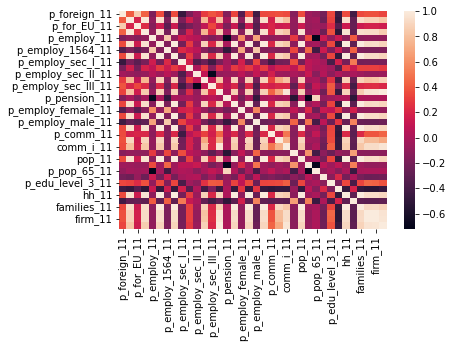

In [ ]:
corrMatrix = state_open_11.corr()
sn.heatmap(corrMatrix, annot=False)
plt.show()

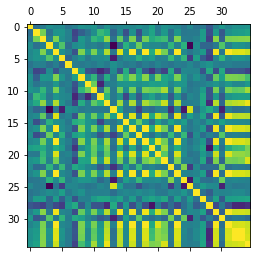

In [ ]:
# Correlation matrix using matplotlib

corr = rural_state_open_19.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')
plt.matshow(corr);

In [ ]:
corr.style.background_gradient(cmap='coolwarm')
fig = plt.figure(figsize=(36,36), dpi = 480)
sn.heatmap(corr, annot = True, fmt = '.2f')

In [ ]:
# Correlation matrix using pandas 

cor = rural_state_open_19.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm') # This line plots nicely visualized matrix of correlation

In [ ]:
# Example of merged dataset for 2019

rural_state_open_19.describe()

rural_type  p_foreign_19   foreign_19  p_employ_19    employ_19  \
count  398.000000    398.000000   398.000000   398.000000   398.000000   
mean   420.452261      6.867990   110.703518    52.197136   768.203518   
std     29.424308      5.914621   184.079663     3.948120   594.224068   
min    330.000000      0.120000     1.000000    39.710000    20.000000   
25%    430.000000      3.042500    30.000000    49.455000   375.500000   
50%    430.000000      5.470000    59.000000    52.250000   600.000000   
75%    430.000000      8.977500   113.750000    55.055000   948.000000   
max    430.000000     64.630000  2396.000000    63.470000  3644.000000   

       p_employ_1564_19  employ_1564_19  p_employ_sec_I_19  employ_sec_I_19  \
count        398.000000      398.000000         398.000000       398.000000   
mean          78.978518     3147.824121          19.985905        61.806533   
std            3.462962    11155.603514          14.496478        55.464471   
min           71.050000       28.000000           0.000000         0.000000   
25%           76.282500      570.000000           8.787500        20.000000   
50%           79.495000      964.000000          17.265000        46.500000   
75%           81.807500     1801.750000          28.312500        87.000000   
max           84.980000   153188.000000         100.000000       321.000000   

       p_employ_sec_II_19  ...  p_pop_65_19  p_edu_level_2_19  \
count          398.000000  ...   398.000000        398.000000   
mean            21.914146  ...    22.115829         65.392714   
std             14.611044  ...     4.258070          4.162671   
min              0.000000  ...    11.000000         50.000000   
25%             11.455000  ...    19.025000         62.725000   
50%             19.025000  ...    22.000000         65.500000   
75%             29.042500  ...    24.900000         68.175000   
max             86.600000  ...    39.200000         76.600000   

       p_edu_level_3_19  p_comm_out_19        hh_19    hh_av_19  families_19  \
count        398.000000     398.000000   398.000000  398.000000   398.000000   
mean           7.103518      67.047487   604.065327    2.456910   422.648241   
std            2.347460      14.048994   479.053875    0.256763   321.220464   
min            0.000000      12.400000    17.000000    1.780000    13.000000   
25%            5.400000      60.400000   287.000000    2.272500   210.000000   
50%            6.900000      70.000000   475.000000    2.430000   330.000000   
75%            8.500000      76.400000   753.250000    2.610000   529.250000   
max           16.700000      96.200000  3006.000000    3.450000  2007.000000   

          comp_19     firm_19  employ_pow_19  
count  398.000000  398.000000     398.000000  
mean   138.517588  152.449749     573.238693  
std    113.839245  127.796521     655.595375  
min      1.000000    1.000000       1.000000  
25%     62.250000   68.250000     175.250000  
50%    106.000000  116.000000     330.500000  
75%    171.000000  186.000000     692.250000  
max    690.000000  801.000000    3945.000000  

[8 rows x 35 columns]

In [ ]:
df= pd.read_excel(r"C:/Users/sjamal.ms20igis/Desktop/LinearRegression/dataRuralAustria/stateatlas_2011-2019.xlsx")

In [ ]:
df

ID                            Name  p_foreign_11  foreign_11  \
0     10101                      Eisenstadt          9.15        1185   
1     10201                            Rust          5.24          99   
2     10301  Breitenbrunn am Neusiedler See          5.61         106   
3     10302                  Donnerskirchen          3.72          64   
4     10303                     Großhöflein          3.25          62   
...     ...                             ...           ...         ...   
2112  91901                    Wien-Döbling         16.84       11462   
2113  92001                Wien-Brigittenau         28.76       23858   
2114  92101                Wien-Floridsdorf         13.89       19745   
2115  92201                 Wien-Donaustadt         11.84       18758   
2116  92301                    Wien-Liesing         11.23       10487   

      p_for_EU_11  for_EU_11  p_employ_11  employ_11  p_employ_1564_11  \
0            6.13        794        50.90       6668             74.16   
1            4.29         81        50.37        955             77.43   
2            4.60         87        49.42        940             74.06   
3            2.73         47        50.86        886             74.72   
4            2.36         45        54.07       1043             75.91   
...           ...        ...          ...        ...               ...   
2112         8.27       5628        44.42      30340             68.09   
2113         8.55       7090        48.59      40502             69.23   
2114         5.23       7439        49.10      70685             72.16   
2115         4.92       7794        50.48      81489             73.28   
2116         5.32       4965        48.92      46209             73.79   

      employ_1564_11  ...  p_pension_19  pension_19  p_employ_female_19  \
0               6602  ...         22.01        3257               69.99   
1                940  ...         28.41         563               74.12   
2                922  ...         30.89         582               69.50   
3                878  ...         28.94         532               68.39   
4               1027  ...         21.94         462               76.70   
...              ...  ...           ...         ...                 ...   
2112           29398  ...         21.43       15828               62.64   
2113           40153  ...         17.69       15290               56.91   
2114           70020  ...         19.85       33232               62.51   
2115           80773  ...         17.64       34287               65.69   
2116           45463  ...         21.76       23883               66.69   

      employ_female_19  p_employ_male_19  employ_male_19  p_comm_19  \
0                 3507             73.10            3540     229.45   
1                  461             81.01             482      71.92   
2                  401             77.00             442      50.65   
3                  409             82.36             481      38.22   
4                  563             82.01             570      38.48   
...                ...               ...             ...        ...   
2112             15367             67.69           15503     105.03   
2113             16940             65.97           20382      78.42   
2114             35415             70.00           38592      84.11   
2115             44788             72.47           46412      77.47   
2116             24298             73.61           25185     120.27   

      comm_o_19  comm_i_19  fam_avc_19  
0          3292      12405        1.55  
1           600        333        1.53  
2           666        247        1.55  
3           691        143        1.49  
4           956        259        1.53  
...         ...        ...         ...  
2112      24710      26294        1.63  
2113      32208      24216        1.70  
2114      59020      47364        1.69  
2115      69823      49468        1.66  
2116      38801      48811        1.65

In [ ]:
col_employ = []
for i in df.columns:
    '''Employment rate of 15 to 64 year olds in the year 2011-19'''
    z=i.find('p_employ_1564') 
    if z != -1:
        col_employ.append(i)
        

        

In [ ]:
df_employ = df.filter(col_employ)
df_employ = df_employ.drop('p_employ_1564_13.1', axis=1)

In [ ]:
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
import numpy as np

KeyError: 'return'

In [ ]:
df_employ.columns

Index(['p_employ_1564_11', 'p_employ_1564_12', 'p_employ_1564_13',
       'p_employ_1564_14', 'p_employ_1564_15', 'p_employ_1564_16',
       'p_employ_1564_17', 'p_employ_1564_18', 'p_employ_1564_19'],
      dtype='object')

In [ ]:
year=[]
for i in df_employ.columns:
    print (i)
    i=i.split('p_employ_1564_')
    year.append(int(i[1]))
    

p_employ_1564_11
p_employ_1564_12
p_employ_1564_13
p_employ_1564_14
p_employ_1564_15
p_employ_1564_16
p_employ_1564_17
p_employ_1564_18
p_employ_1564_19


In [ ]:
df_employ

p_employ_1564_11  p_employ_1564_12  p_employ_1564_13  p_employ_1564_14  \
0                74.16             73.63             75.10             75.41   
1                77.43             77.22             77.61             78.84   
2                74.06             73.88             77.02             78.22   
3                74.72             74.64             75.41             74.53   
4                75.91             76.72             78.33             79.73   
...                ...               ...               ...               ...   
2112             68.09             68.59             70.34             70.49   
2113             69.23             69.32             71.09             71.64   
2114             72.16             72.67             74.02             74.51   
2115             73.28             73.85             74.73             74.55   
2116             73.79             74.24             75.03             75.11   

      p_employ_1564_15  p_employ_1564_16  p_employ_1564_17  p_employ_1564_18  \
0                74.12             55.44             56.56             56.29   
1                79.64             58.41             59.05             57.35   
2                77.94             60.77             59.19             59.28   
3                76.00             60.96             60.89             61.50   
4                80.61             61.83             61.61             62.03   
...                ...               ...               ...               ...   
2112             70.15             86.38             86.70             86.84   
2113             72.10             86.68             86.80             87.17   
2114             75.08             87.62             87.41             87.37   
2115             75.03             87.72             87.45             87.57   
2116             75.65             88.64             87.50             90.72   

      p_employ_1564_19  
0                56.46  
1                57.38  
2                58.55  
3                61.24  
4                62.30  
...                ...  
2112             88.57  
2113             89.13  
2114             89.25  
2115             89.71  
2116             89.73  

[2117 rows x 9 columns]

In [ ]:
'''employment for all Austria (year_wise_mean)'''
array_mean_p_employ=[]
for i in df_employ.columns:
    array_mean_p_employ.append(df_employ[i].values.mean()) 
    print('mean',i, df_employ[i].values.mean())

mean p_employ_1564_11 75.8425413320737
mean p_employ_1564_12 76.12480869154464
mean p_employ_1564_13 77.4287623996221
mean p_employ_1564_14 77.8198535663675
mean p_employ_1564_15 78.06555030703827
mean p_employ_1564_16 78.41024090694378
mean p_employ_1564_17 79.08247047709023
mean p_employ_1564_18 79.54978743504961
mean p_employ_1564_19 79.87789324515825


In [ ]:
year

[11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
x_train

array([[11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19]])

In [ ]:
y_train

array([[74.16, 73.63, 75.1 , ..., 56.56, 56.29, 56.46],
       [77.43, 77.22, 77.61, ..., 59.05, 57.35, 57.38],
       [74.06, 73.88, 77.02, ..., 59.19, 59.28, 58.55],
       ...,
       [72.16, 72.67, 74.02, ..., 87.41, 87.37, 89.25],
       [73.28, 73.85, 74.73, ..., 87.45, 87.57, 89.71],
       [73.79, 74.24, 75.03, ..., 87.5 , 90.72, 89.73]])

In [ ]:
plt.plot(x_train.index,y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [ ]:
from scipy.stats import jarque_bera

'''Check normal distribution through statistical test'''

result = (jarque_bera(y_train))

print(f"JB statistic: {result[0]}")
print(f"p-value: {result[1]}")

JB statistic: 6481.090168446855
p-value: 0.0


In [ ]:
x_train = np.array(year).reshape(-1,1)

y_train = np.array(array_mean_p_employ)

model = skl.LinearRegression().fit(x_train, y_train)

prediction_x = np.array(25).reshape(-1,1)
predicted_value = model.predict(prediction_x)


In [ ]:
prediction_x

array([[2020]])

In [ ]:
predicted_value

array([83.07479216])

No handles with labels found to put in legend.


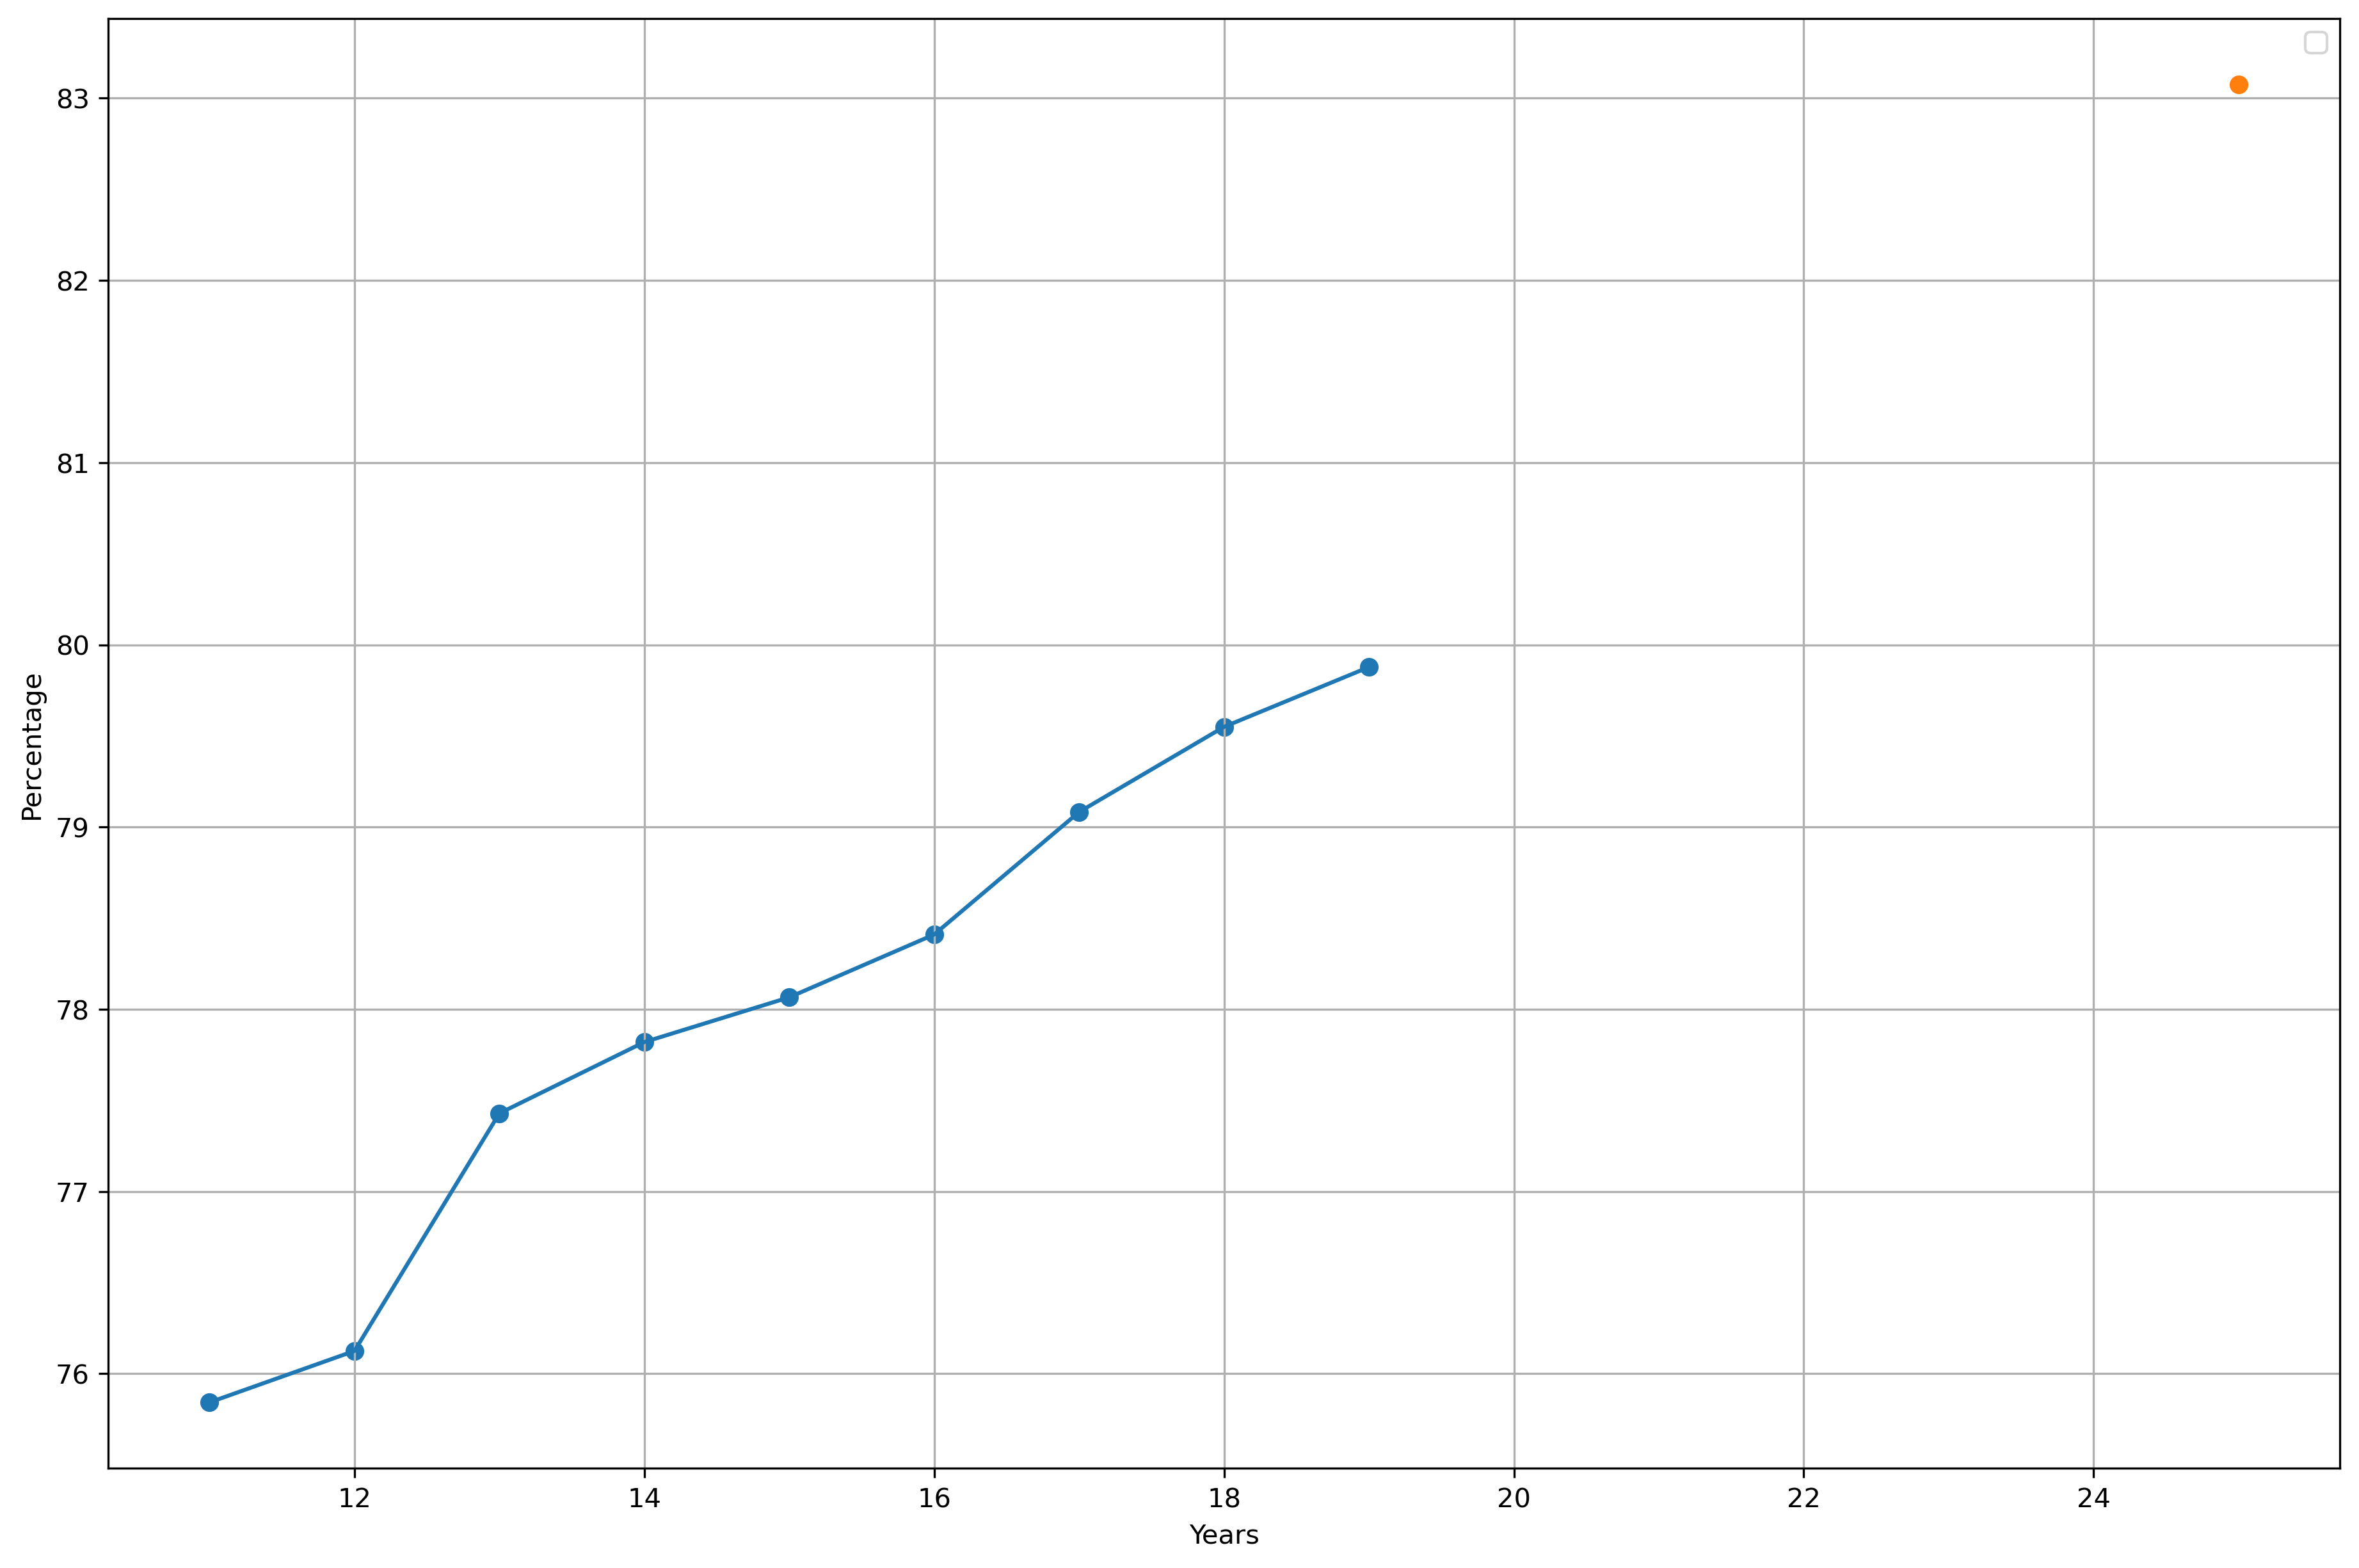

In [ ]:
fig1=plt.figure(figsize=(15, 10) ,dpi=300)

x=x_train
y=y_train

x_O=np.array(25).reshape(-1,1)
y_O=predicted_value

plt.plot(x, y, label="" )
plt.plot(x_O, y_O, label="" )
plt.scatter(x, y, label="" )
plt.scatter(x_O, y_O, label="" )

plt.title("")
plt.xscale("linear")
plt.yscale("linear")
plt.xlim()
plt.ylim()
plt.xlabel("Years")
plt.ylabel("Percentage")
plt.grid(which='major')
plt.grid(which='minor')
plt.legend(loc='best')
#plt.xticks(np.arange(0, len(x),step=15),rotation=45)


fig1.savefig("Comparison.png", dpi=300)
plt.show()

In [ ]:
int(df_employ.columns.split("1564_"))


AttributeError: 'Index' object has no attribute 'split'

In [ ]:
df_employ.columns.split("1564_")

AttributeError: 'Index' object has no attribute 'split'

In [ ]:
for i in df_employ.columns:
    j=i.split("1564_")
    print(j)

['p_employ_', '11']
['p_employ_', '12']
['p_employ_', '13']
['p_employ_', '14']
['p_employ_', '15']
['p_employ_', '16']
['p_employ_', '17']
['p_employ_', '18']
['p_employ_', '19']


In [ ]:
x_train

array(['p_employ_1564_11', 'p_employ_1564_12', 'p_employ_1564_13',
       'p_employ_1564_14', 'p_employ_1564_15', 'p_employ_1564_16',
       'p_employ_1564_17', 'p_employ_1564_18', 'p_employ_1564_19'],
      dtype=object)

In [ ]:
y_train

array([[74.16, 73.63, 75.1 , ..., 56.56, 56.29, 56.46],
       [77.43, 77.22, 77.61, ..., 59.05, 57.35, 57.38],
       [74.06, 73.88, 77.02, ..., 59.19, 59.28, 58.55],
       ...,
       [72.16, 72.67, 74.02, ..., 87.41, 87.37, 89.25],
       [73.28, 73.85, 74.73, ..., 87.45, 87.57, 89.71],
       [73.79, 74.24, 75.03, ..., 87.5 , 90.72, 89.73]])

In [ ]:
reg = skl.LinearRegression().fit(x_train,y_train)


ValueError: could not convert string to float: 'p_employ_1564_11'

In [ ]:
while i < len(df):
    
    
    
    
    
    
    i=i+1

TypeError: '<' not supported between instances of 'str' and 'int'